# Kmeans (Using scikit-learn lib)
After some illuminating comments, I recognise the exact solution is intractable for even moderate problem sizes.

One possible approximate solution uses K-means clustering. Here is an example in 2D so I can include a plot.

## Finding nearest node yo center
we can find which of the original points is nearest to each cluster centre(by using "scipy"):

Then, we can plot the result:

In [2]:
# k = number of points
def finding_poin(k,room):
    
    # using Kmeans
    from sklearn.cluster import KMeans
    import numpy as np
    np.random.seed(99)
    k = k
    n = 50*k
    pts2D = np.zeros([n,2])
    pts2D[:,0] = np.random.uniform(0, room[0], n)
    pts2D[:,1] = np.random.uniform(0, room[1], n)
    # pts2D = np.random.uniform(0, 10, (n, 2))

    kmeans = KMeans(n_clusters=k, random_state=0).fit(pts2D)
    labels = kmeans.predict(pts2D)
    cntr = kmeans.cluster_centers_
    
    # finding nearest point to center
    from scipy.spatial import distance_matrix
    # indices of nearest points to centres
    approx = []
    
    ## Finding nearest node yo center
    # Now we can find which of the original points is nearest to each cluster centre(by using "scipy"):
    for i, c in enumerate(cntr):
        lab = np.where(labels == i)[0]
        # print(lab)
        pts = pts2D[lab]
        # print(pts)
        d = distance_matrix(c[None, ...], pts)
        # print(d)
        idx1 = np.argmin(d, axis=1) + 1
        idx2 = np.searchsorted(np.cumsum(labels == i), idx1)[0]
        approx.append(idx2)
        
    # plotting node which have been used and centers
    fig, ax = plt.subplots(figsize=(room[0], room[1]))
    # ax.plot(pts2D[:, 0], pts2D[:, 1], '.')
    ax.plot(cntr[:, 0], cntr[:, 1], 'x')
    # ax.plot(pts2D[approx, 0], pts2D[approx, 1], 'r.')
    ax.set_aspect("equal")
    fig.legend(["points", "centres", "selected"], loc=1)
    
    return cntr

In [3]:
# add R for each center

runing time 1.07350492477417


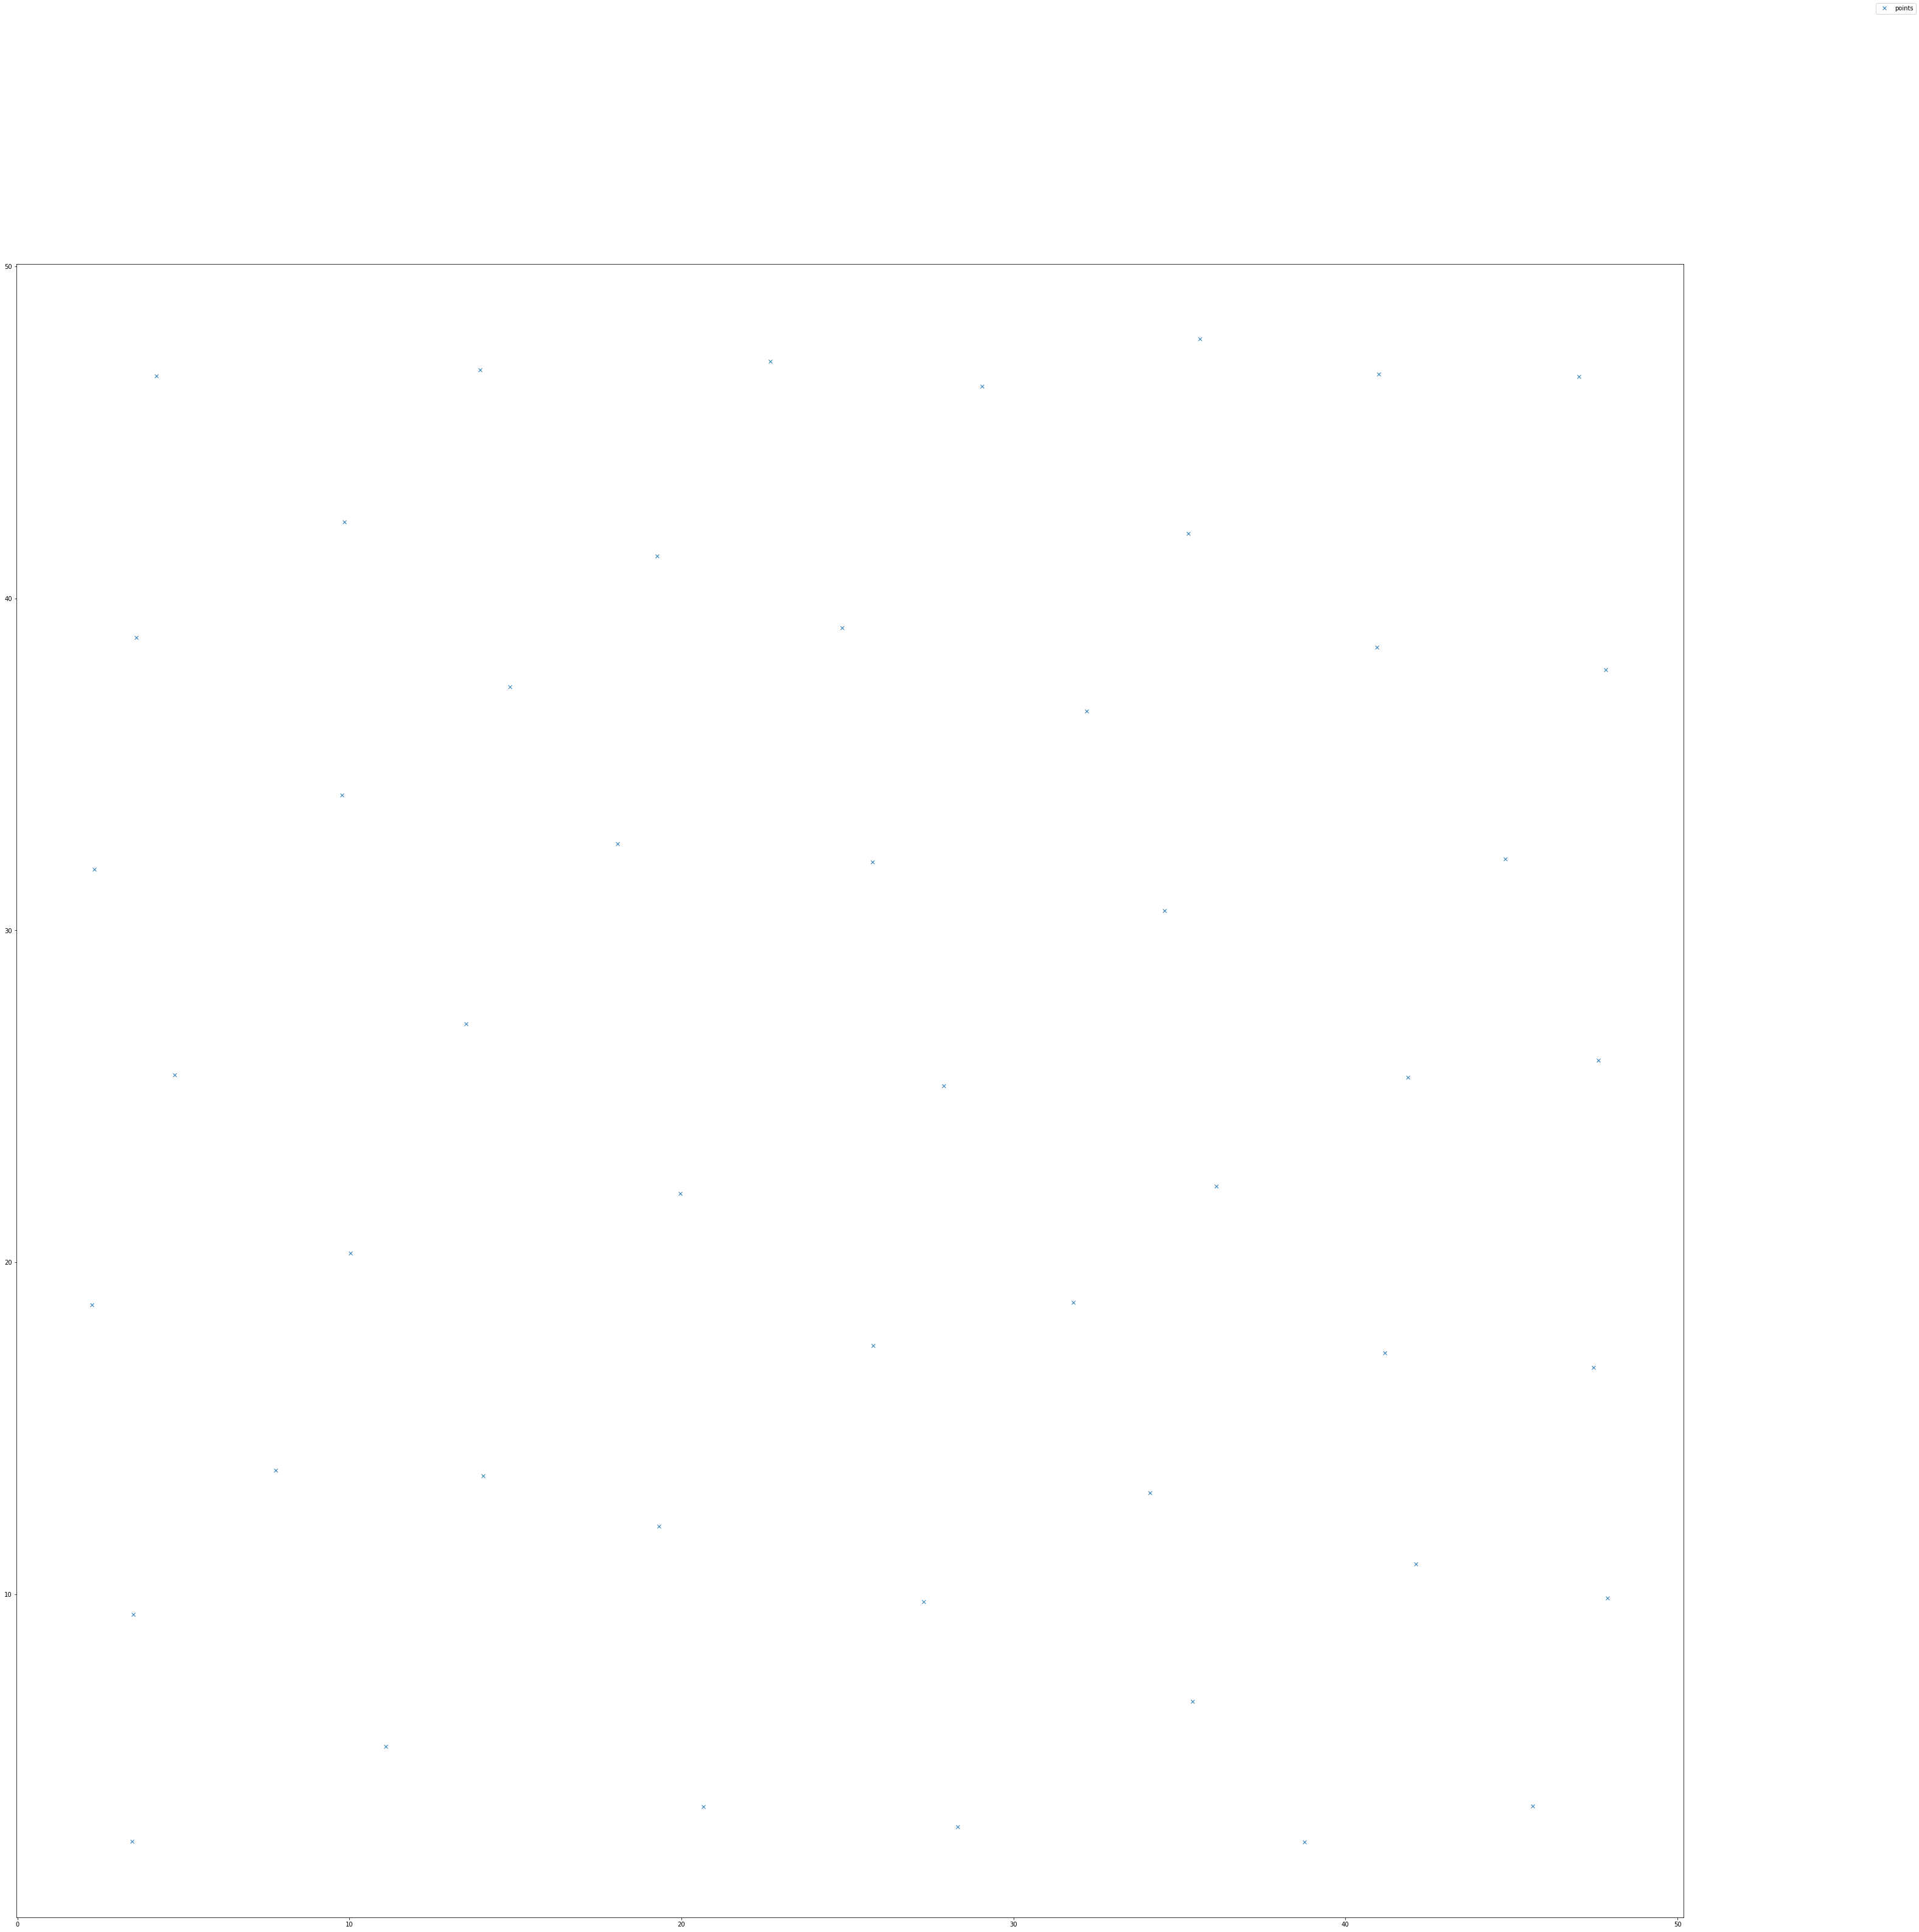

In [4]:
t1 = time.time()
k = 50
room = np.array([50,50])
center_kmeans_1 = finding_poin(k,room)
t2 = time.time()
print("runing time",t2-t1)

# Cross Correlation gNodeB
baraye in ye matrix random misazim ke roy in rhtemalato ok konim

In [41]:
def Cross_Cor_GB(centers):
    # # for correlation of Cross Correlation
    # cc = np.zeros([len(centers),len(centers)])
    # for i in range(len(centers)):
    #     for j in range(len(centers)):
    #         cc[i,j] = 
      
    ## using random numbers Instead of correlation
    CC = np.random.uniform(0, 1, (len(centers),len(centers)))
    # putting the original diameter of the matrix to 1
    CC[np.arange(len(CC)),np.arange(len(CC))] = 1
    return CC # a matrix which has Row and Columns of Cross Crrelattion probability

In [42]:
## for test
# CC = np.random.uniform(0, 1, (k,k))
# print("before",CC)
# CC[np.arange(len(CC)),np.arange(len(CC))]=1
# print("after",CC)

# Assign bearers to UE and gNodeB

In [49]:
def assign_bearers(x_UE,centers):
    # # with having data (based on the main algorithm will changed)
    # gNodeB = np.zeros([len(centers)])
    # UE np.zeros([len(x_UE)])
    
    # using random numbers Instead of correlation
    gNodeB_CH = np.random.randint(0, 5, (len(centers),1))
    UE_CH = np.random.randint(0, 5, (len(x_UE),1))
    return gNodeB_CH,UE_CH 

In [48]:
# gNodeB_CH = np.random.randint(0, 5, (50,1))
# UE_CH = np.random.randint(0, 5, 1)
# gNodeB_CH

# Probability of Loss

# Fuzzy C-Means

Fuzzy C-Means minimizes the functional

  $$J(U, V) = \sum_{h=1}^{n}\sum_{i=1}^{c} \left( u_{ih} \right)^m \| \mathbf{x}_h - \mathbf{v}_i \|^2 \;, \qquad \forall h=1, \ldots, n\qquad \forall i=1, \ldots, c$$


  
 with the  probabilistic constraint

  $$\sum_{i=1}^{c} u_{ih} = 1 $$
  
  where ${\bf x}_h$ are the point of the data set, $c$ is the number of clusters,  ${\bf v}_i$ are the centroids, and
  $u_{ih}$ are the membrships of data points to clusters.
 
 
In this implementation we will initialize the cluster centers ${\bf v}_i$ by selecting at random  $c$  points from the data set, and  then we will iterate the re-evaluation of all $u_{ih}$ and of $\bf {v}_i$,

 $$ u_{ih} = \frac{1}{\sum_{j=1}^{c}
    \left( \frac{\| \mathbf{x}_h - \mathbf{v}_i \|}{\|\mathbf{x}_h - \mathbf{v}_j\|} \right)^{\frac{2}{m-1}} }$$

 
$$ \mathbf{v}_i = \frac{\sum_{h=1}^{n} \left( u_{ih} \right)^m \mathbf{x}_h}
         {\sum_{h=1}^{n} \left( u_{ih} \right)^m}$$

 
until a STOP CRITERION holds.
 
The STOP CRITERION can be either: 
1. *Stop when the variation of $J(U, V)$ in two subseguent cycles ($\Delta J$) is under an assigned threshold $\tau > 0$*.
2. *Stop when the variation of $$ E(X) =\sum_{ih} u_{ih}\| {\bf x}_{h} - {\bf v}_i \|^2 $$ 
in two subseguent cycles ($\Delta E$) is under an assigned threshold $\tau >0 $*.
3. *Stop when the maximum variation of the centroids ${\bf v}_i$ in  two subseguent cycles ($\Delta {\bf v}$) is under an assigned threshold $\tau \ge 0$*.
4. *Stop when the maximum variation of the memberships  $u_{ih}$ in two subseguent cycles ($\Delta u$) is under an assigned threshold $\tau \ge 0$*.
5. Stop after an assigned number $S$ of iterations.



We suggest to use the following combined STOP CRITERION:  **Stop after an assigned number $S$ of iterations** AND **Stop when the variation of $<E> =\frac{E(X)}{c\cdot n}$ in two subseguent cycles ($\Delta <E>$) is under an assigned threshold $\tau > 0$**.



In [2]:
# add here the required imports
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d #for voronoi tessellation
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import time
import math
import random

class Fuzzy_C_Means:

    def __init__(self, n_clusters, m=2, tau=0.001, max_iter=300, verbose=False):
        self.n_clusters = n_clusters # number of centroids
        self.m = m # the fuzzyness parameter (usually m=2)
        self.tau = tau # stopping threshold
        self.max_iter = max_iter # maximum number of iterations in case of no convergence
        self.verbose = verbose # detailed printout
        self.cost = list() # service variable to store cost history
        self.cost_1 = list()
        self.centroids = None # centroids after fitting
        self.U = None # membership matrix (for K-Means U is hard, i.e. its element are 0/1)
        self.u = None # membership matrix (for Fuzzy)
        
        # other variables shared among the various functions
        self.n = 0 # holds the dataset size
        self.prev_error = np.inf # assign initial error as infinite
        self.prev_error_1 = np.inf
        self.iteration = None # interation number
        self.error =  None # private variable to hold error E(X)
        self.error_1 =  None
        self.distances = None # private variable to hold distances
        self.distances_1 = None
        self.prev_centroids = None
        self.prev_centroids_1 = None
        self.x_map = None
    
    def get_centroids(self):
        return self.centroids
    
    def get_u(self):
        return self.u
    
    def get_cost_history(self):
        return self.cost
    
    def plot_cost_history(self, size_x = 15, size_y = 6, data=None, label=None):
        if data==None:
            data= self.cost
        if label==None:
            label = 'Cost History'
            
        # simply plot the cost history
        fig, ax = plt.subplots(figsize=(size_x,size_y))

        ax.plot(data, color='r', label=label)     # cost line
        ax.legend()
        plt.show()
        return ax

    # ui random
    def init_membership_random(self, num_of_points):
        for i in range(num_of_points):
            row_sum = 0.0
            for c in range(self.n_clusters):
                if c == self.n_clusters-1:  # last iteration
                    self.u[i][c] = 1.0 - row_sum
                else:
                    rand_clus = random.randint(0, self.n_clusters-1)
                    rand_num = random.random()
                    rand_num = round(rand_num, 2)
                    if rand_num + row_sum <= 1.0:  # to prevent membership sum for a point to be larger than 1.0
                        self.u[i][rand_clus] = rand_num
                        row_sum += self.u[i][rand_clus]
        #print("u is printing sum random",np.sum(self.u))
    def distance_squared(self, x, c):
        sum_of_sq = (np.dot(x-c,x-c))
        return sum_of_sq

    
    # vi 
    def compute_cluster_centers(self, x):
        num_of_points = x.shape[0]
        num_of_features = x.shape[1]
        # if update_func is None:
        #-------------- update with np.sum --------------------#
        for c in range(self.n_clusters):
            sum1_vec = 0.0
            sum2_vec = 0.0
            # re write with np.sum and np.dot
            for i in range(num_of_points):
                interm1 = np.sum(self.u[i][c] ** self.m)
                interm2 = interm1 * x[i]
                sum1_vec += interm2
                sum2_vec += interm1
            self.centroids[c] = (sum1_vec/sum2_vec)
            # print("printer",self.centroids[c])
       
        return self.centroids
    
    # ui 
    def compute_membership(self, x):
        for i in range(x.shape[0]):
            for c in range(len(self.centroids)):    
                # clean_X = x
                d1 = self.distance_squared(x[i], self.centroids[c])
                sum1 = 0.0
                for j in self.centroids:  # this is to compute the sigma
                    d2 = self.distance_squared(j, x[i])
                    # if d2 == 0.0:
                    #     # for not being devided by zero
                    #     d2 = 0.00001
                    sum1 += (d1/d2) ** (1.0/(self.m-1))
                self.u[i][c] =  sum1 ** -1 
        
 
    def calc_cost(self):
        
        # set the distances other than minimal to zero
        # calculation of cost function:
        
        x_map = np.argmin(self.distances,axis=1)
        
        # u = np.zeros_like(self.distances)
        # u[np.arange(self.n),x_map]
        
        
        #print("X map is printing ",x_map)
        dist = np.multiply(self.distances,self.u**self.m)
        #print("distance is printing",self.distances)
        #dist = self.distances
        if self.verbose: sys.stderr.write('dist: {}\n'.format(dist))
        # compute the error - <E> expectation of distortion
       
        self.error = np.sum(dist)
        #print("self error is printing",self.error)
        #self.error = np.sum(dist)
       
        #delta_e = np.abs(self.prev_error - error)
        delta_e = self.prev_error - self.error
        #print ("error= ", error, " delta_error= ", delta_e)
        self.cost.append(self.error)
        self.prev_error = self.error
        #print("delta is printing",delta_e)
        return delta_e
    
    def calc_cost_1(self):
        
        # set the distances other than minimal to zero
        # calculation of cost function:
        
        x_map = np.argmin(self.distances,axis=1)
        u = np.zeros_like(self.distances)
        u[np.arange(self.n),x_map] = 1
        #print("u is printing ---",u)
        dist_ = np.multiply(self.distances,u)
        #print("distance is printing",self.distances)
        dist_1 = dist_ /(self.n_clusters*self.n)
        if self.verbose: sys.stderr.write('dist: {}\n'.format(dist))
        # compute the error - <E> expectation of distortion
       
        self.error_1 = np.sum(dist_1)/(self.n_clusters*self.n)
        #print("self error is printing",self.error)
        #self.error = np.sum(dist)
       
        #delta_e = np.abs(self.prev_error - error)
        delta_e_1 = self.prev_error_1 - self.error_1
        #print ("error= ", error, " delta_error= ", delta_e)
        self.cost_1.append(self.error_1)
        self.prev_error_1 = self.error_1
        #print("delta is printing",delta_e)
        return delta_e_1



    def predict(self,x):
        # checks the test samples and return the list of centroid indexes 
        # which each sample belongs to

        if self.verbose: sys.stderr.write('centroids: {}\n'.format(self.centroids))
        
        
        # compute distances from centroids
        for j in range(self.n):
            for i in range(self.n_clusters):
                #self.distances[j][i] = np.sqrt(np.sum((x[j]-self.centroids[i])**2))
                #self.distances[j][i] = np.sum((x[j]-self.centroids[i])**2)
                # writing the main function for calculation *-------------------------------
                self.distances[j][i] = np.sum(np.dot(x[j]-self.centroids[i],x[j]-self.centroids[i]))
                # In the implementation of K-Means  we sort the distances of an instance from  
                # all centroids using the squared Euclidean distance, 
                # as the square root is a monotone function. 
           
                
        #print (self.distances)
        # assign the points of the data sets to the k clusters (nearest centroid)
        self.x_map = np.argmin(self.distances,axis=1)
        return self.x_map

    def get_centroids_distance(self):
        clu_dist = 0
        for c, pc in zip(self.centroids,self.prev_centroids): clu_dist += np.sqrt(np.dot(c-pc,c-pc))
        return clu_dist
    
    def fit (self, x):
        # performs kmeans clustering on training samples and assign centroids
        self.n = x.shape[0]  # number of training items
        c = x.shape[1]  # number of features 
        
        # for calculation U
        if self.u is None:
            num_of_points = x.shape[0]
            self.u = np.zeros((num_of_points, self.n_clusters), dtype=float)
            self.init_membership_random(num_of_points)
        #print("shape U = ",self.u.shape)
        
        #----------------
        # initialize the n_centroids by selecting at random  n_centroids  points from the data_set
        if self.centroids is None:
            idx = np.random.randint(self.n,size=self.n_clusters)
            self.centroids = x[idx].copy()
            self.prev_centroids = self.centroids.copy()
        #print("centroid random",self.centroids.shape)
        #----------------
        
        
        # create a distance matrix with the same shape as the membership one   *** vi ***
        self.distances = np.zeros_like(self.u,dtype=float)
        self.distances_1 = np.zeros_like(self.u,dtype=float)
        # iterate while DELTA E > tau (STOP CRITERION #1) or max_iter not reached
        loop = True
        self.iteration = 0
        while (loop):
            
            self.x_map = self.predict(x)
            if self.verbose: sys.stderr.write('x_map: {}\n'.format(self.x_map))

            #   calculate the new k centroids
            for i in range(self.n_clusters):
                # perform the average only if the centroid has assigned elements
                # otherwise NaN is assigned and the algorithm has errors
                if (self.x_map == i).any(): 
                    self.centroids[i] = np.average(x[self.x_map == i],axis=0)


            # calculate cost
            delta_cost = self.calc_cost()
            
            # match training data to the current centroids and update their
            # membership index list
            # self.x_map = self.predict(x)
            # if self.verbose: sys.stderr.write('x_map: {}\n'.format(self.x_map))
            
            # calculation Ui
            self.compute_membership(x)
            # membership_history.append(self.u.copy())
            
            #   calculate the new k centroids
            self.compute_cluster_centers(x)
            
            # calculate cost
            delta_cost = self.calc_cost()
            delta_cost_1 = self.calc_cost_1()
            
            self.iteration +=1 
            # break the loop if the stopping conditions are met
            clu_dist = self.get_centroids_distance()
            self.prev_centroids = self.centroids.copy()
            if self.verbose:
                  print(self.iteration, "error= ", self.error, " delta_error <E> = ", delta_cost_1," delta_error <J>= ", delta_cost, "tau = ", self.tau)
            #loop = ((abs(delta_cost_1) > self.tau)) and (self.iteration < self.max_iter)
            
            # function below uses fuzzy function to stop 
            loop = ((abs(delta_cost) > self.tau) or (abs(delta_cost_1) > self.tau)) and (self.iteration < self.max_iter)

            #loop = (delta_cost > self.tau) and (clu_dist > self.tau) and (self.iteration < self.max_iter)

        # set the membership matrix for the final configuration 
        # self.U[np.arange(self.n),self.x_map] = 1

        return self

In [3]:
def multi_start_FC(x,n_clusters,m=2,tau=.0001, num_iter=1):
    # constants assignement
    precision = 15
    E = np.inf

    runs = num_iter  # number of re-starts
    # n_clusters
    tau_val=tau
    
    
    
    t_before = time.time()
    for i in range(runs):
        
        FC = Fuzzy_C_Means(n_clusters  ,m=2 , tau=tau_val, verbose=False)
        
        FC.fit(x)
        EE= FC.error
        EE_1 = FC.error_1
        # print("error is ",EE)
        Niter= FC.iteration
        #print("run = {} - <E> = {:.{}f} ".format(i, EE, precision))
        print("run = {} - iterations = {} - <J> ={} - <E> = {:.{}f} ".format(i, Niter-1, EE, EE_1, precision))
        
        if (EE_1 < E) and (EE < E) :
            # store the best instance of trained model
            FCMi = FC
            E_1 = EE
            E_2 = EE_1
            best_run=i

    print ('\n best run = {} - <J> ={} - <E> = {:.{}f}'.format(best_run, E_1, E_2, precision))
    t_after = time.time()
    ## Compute training time
    t_training = t_after - t_before
    print("Time for multi-start training (seconds): {:.{}f} - runs = {}\n".format(t_training, precision, runs))

    return FCMi, E, best_run

In [4]:
def plot_clustered_data(x,c,preds):
    size_x = 16
    size_y = 6

    vor = Voronoi(c)

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(size_x,size_y))
    # ax1.scatter(x[:,0], x[:,1], c=y, alpha=0.5)
    # ax1.set_title('Original Data')
    # #ax1.legend()

    ax2.scatter(x[:,0], x[:,1], c=preds, alpha=0.5, label='Predictions')
    ax2.scatter(c[:,0], c[:,1], marker='P', c='red', label='Centroids')
    ax2.set_title('Clustered Data')
    ax2.legend()

    voronoi_plot_2d(vor, ax2, show_points=False, line_width=1, show_vertices=False)
    ax2.set_xlim(min(x[:,0])-1,max(x[:,0])+1)
    ax2.set_ylim(min(x[:,1])-1,max(x[:,1])+1)

    plt.show()

In [ ]:
'''
***The code for caculating accuracy by Rand and Jaccard has been added to the above code***
'''
#***************_______________________*******************#
# running Kmeans for Iris Dataset, dataset1 and dataset2
# dataset3 = Iris Dataset

import numpy as np
k = 50
room = np.array([50,50])
np.random.seed(99)
# k = k
n = 50*k
pts2D = np.zeros([n,2])
pts2D[:,0] = np.random.uniform(0, room[0], n)
pts2D[:,1] = np.random.uniform(0, room[1], n)


FC, E, best_run = multi_start_FC(pts2D, k,num_iter=10)
c = FC.get_centroids()
U = FC.get_u()

hist = FC.get_cost_history()
p = FC.predict(pts2D)
col_list = ['near to center :{} by soft U'.format(i) for i in range(k)]
dn = pd.DataFrame(U,columns=col_list)
col_label = 'Hard U'
uh = pd.Series(p, name=col_label)
dn = pd.concat([dn,uh],axis=1)
dn.head()
# Measure the accuracy of the best hard partition obtained with K-Means by comparing 
# it with the ground-truth constituted by the targets of the data sets. 
# For the comparison use RAND and Jaccard indeces.
# print("----------- Jaccard index--------------")
# print("Jaccard index = ",jaccard(tt.astype(int),p.astype(int)),"\n")
# print("------------ Rand index ---------------")
# print("Rand index = ",rand(tt.astype(int),p.astype(int)),"\n")
# print("-------------------- Hard and Soft Clustering Table -----------------------")
# print(dn)
#print(U,"predict",p)
plot_clustered_data(pts2D,c,p)
FC.plot_cost_history(data=hist, label="Learning curve")

In [35]:
# add R for each center

In [18]:
# This Data Frame is showing the possibilities of each point to the clusters.
dn

,near to center :0 by soft U,near to center :1 by soft U,near to center :2 by soft U,near to center :3 by soft U,near to center :4 by soft U,Hard U
0,0.250828,0.037694,0.027588,0.630853,0.053038,3
1,0.043442,0.054623,0.037479,0.830338,0.034119,3
2,0.061708,0.040546,0.110632,0.077225,0.709888,4
3,0.046797,0.123238,0.650898,0.087715,0.091351,2
4,0.890269,0.016706,0.010403,0.063667,0.018954,0
...,...,...,...,...,...,...
245,0.032768,0.058110,0.747672,0.061824,0.099625,2
246,0.027603,0.763477,0.101956,0.079222,0.027743,1
247,0.042997,0.063631,0.648548,0.079424,0.165401,2
248,0.078631,0.089961,0.309040,0.238884,0.283483,2
